In [1]:
import numpy as np 
import pandas as pd 
import plotly.graph_objs as go #visualization 
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline 
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True) 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customer = pd.read_csv('Customer-Churn.csv', sep=',') 
customer.head()

FileNotFoundError: ignored

In [0]:
customer.shape

(7043, 21)

In [3]:
#is any row NULL ?

customer.isnull().any()

NameError: ignored

In [0]:
customer.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [0]:
#labels
lab = customer["Churn"].value_counts().keys().tolist()
#values
val = customer["Churn"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               hole = .5
              )
layout = go.Layout(dict(title = "Customer attrition rate in Y-Mobile",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)


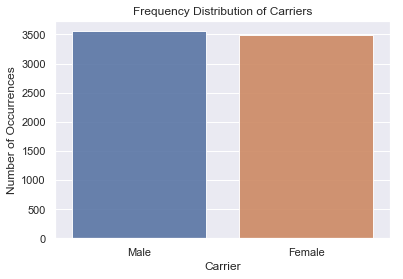

In [0]:
#Gender distribution in the data 
gender_count = customer["gender"].value_counts()
sns.set(style="darkgrid")
sns.barplot(gender_count.index, gender_count.values, alpha=0.9)
plt.title('Frequency Distribution of Gender')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

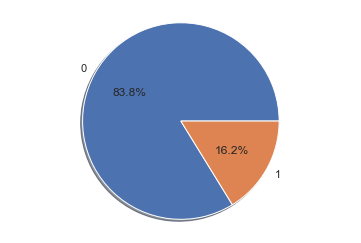

In [0]:
#distribution of senior citizen - 0 denotes young citizen and 1 denotes senior citizen 
labels = customer['SeniorCitizen'].astype('category').cat.categories.tolist()
counts = customer['SeniorCitizen'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

Text(0.5, 1.0, 'Number of Customers by their tenure')

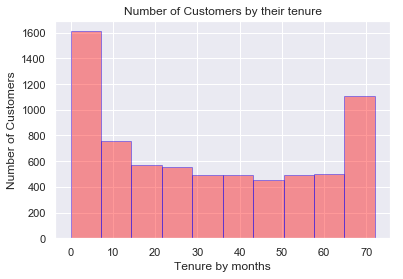

In [0]:
ax = sns.distplot(customer['tenure'], hist=True, kde=False, 
             bins=int(50/5), color = 'red', 
             hist_kws={'edgecolor':'blue'}) 
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure by months')
ax.set_title('Number of Customers by their tenure')

Text(0.5, 1.0, 'Number of Customers by Contract Type')

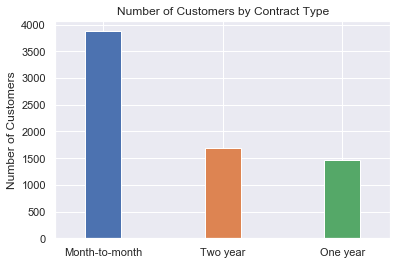

In [0]:
ax = customer['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Contract Type')

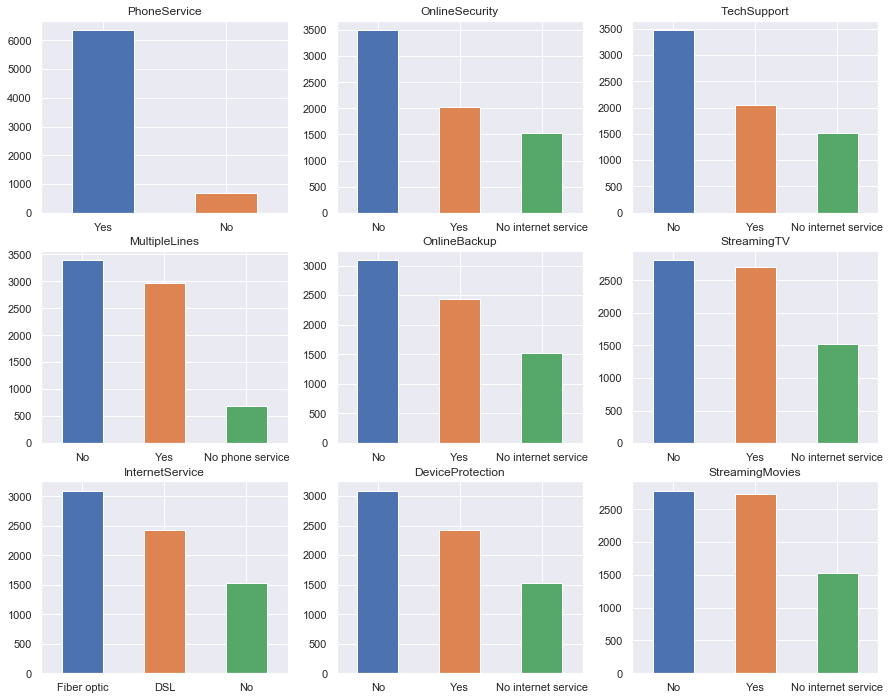

In [0]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = customer[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = customer[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = customer[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

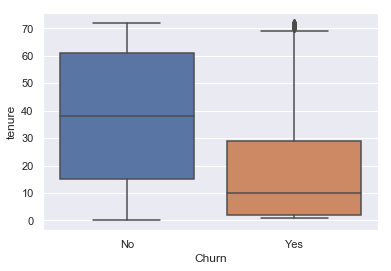

In [0]:
#attrition rate with tenure 
sns.boxplot(x = customer.Churn, y = customer.tenure)

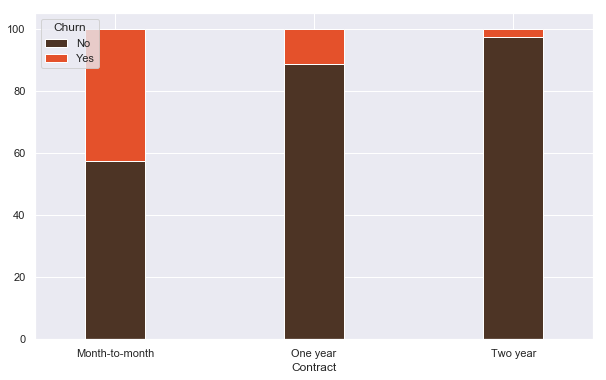

In [0]:
#attrition rate by contract
colors = ['#4D3425','#E4512B']
contract_churn = customer.groupby(['Contract','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)

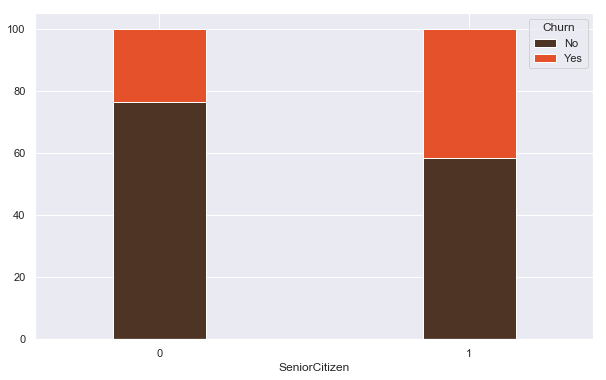

In [0]:
#attrition rate by seniority 0 denotes young citizen and 1 denotes senior citizen 
colors = ['#4D3425','#E4512B']
contract_churn = customer.groupby(['SeniorCitizen','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)

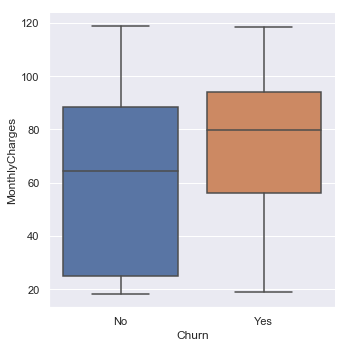

In [0]:
#Higher monthly charges with churn rate
sns.catplot(x="Churn", y="MonthlyCharges", kind="box", data=customer);

In [0]:
#Replacing spaces with null values in total charges column
customer['TotalCharges'] = customer["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column which contain .15% missing data 
customer = customer[customer["TotalCharges"].notnull()]
customer = customer.reset_index()[telcom.columns]
#Higher monthly charges with churn rate
customer["TotalCharges"] = customer["TotalCharges"].astype(float)
#sns.catplot(x="Churn", y="TotalCharges", kind="box", data=customer);

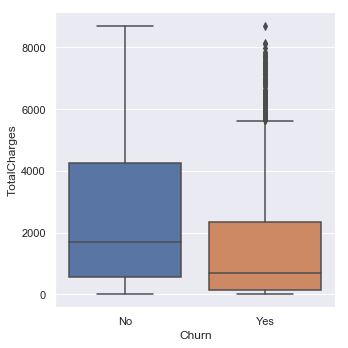

In [0]:
#Higher total charges with churn rate
sns.catplot(x="Churn", y="TotalCharges", kind="box", data=customer);